In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = '/content/drive/MyDrive/dataset/data.csv'
dataset = pd.read_csv(file_path)
print(dataset.shape)

(45200, 10)


In [8]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

In [9]:
dataset['hour'] = dataset['datetime'].dt.hour
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek
print(dataset.shape)


(45200, 12)


In [10]:
X = dataset.iloc[:, [2, 3, 4, 5, 6, 7, 8, 10, 11]].values
y = dataset.iloc[:, [9]].values.ravel()
print(X.shape)


(45200, 9)


In [11]:
print(dataset.isnull().sum())

ID                0
datetime          0
siteid         4518
offerid           0
category          0
merchant          0
countrycode       0
browserid      2345
devid          6864
click             0
hour              0
day_of_week       0
dtype: int64


In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X[:, [5, 6]] = imputer.fit_transform(X[:, [5, 6]])

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
X[:, [0]] = imputer.fit_transform(X[:, [0]])


In [13]:
categorical_columns = [4, 5, 6, 7, 8]
label_encoder = LabelEncoder()

for column in categorical_columns:
    X[:, column] = label_encoder.fit_transform(X[:, column])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [15]:
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(dataset.isnull().sum())


ID                0
datetime          0
siteid         4518
offerid           0
category          0
merchant          0
countrycode       0
browserid      2345
devid          6864
click             0
hour              0
day_of_week       0
dtype: int64


In [16]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')



Accuracy: 0.9022123893805309
F1 Score: 0.8864628820960698


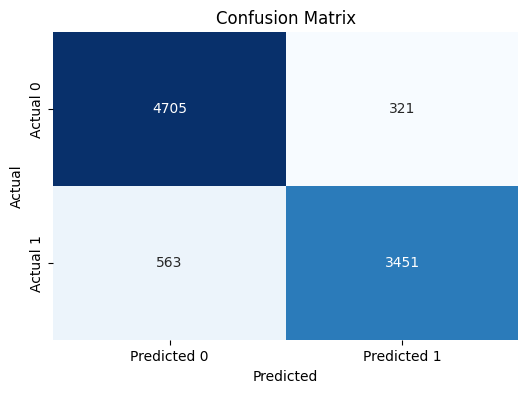

In [19]:
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(6, 4))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()